# <center>TMDP movies Data Analysis Project</center>

## Table of contents:
- `Phase one:` Data Gathering.
- `Phase two:` Assesing.
- `Phase three:` Cleaning.
- `Phase four:` Visualization and Analysis.

# Phase one: Data Gathering.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
movies = pd.read_csv('tmdb-movies.csv')

# Phase two: Assesing.

In [3]:
# Checking the first few values of the dataset.
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Checking the last few values of the dataset.
movies.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Checking for missing values and datatypes.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Checking for max values, min values, mean values and count
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Checking for duplicated values.
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Checking for column names.
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### <font color='Purple'>Quality</font>

#### <font color='Grey'>Accuracy issues:</font>
- Budget of the movie title "The Warrior's Way" is wrong. (42,000,000 instead of 425,000,000)

#### <font color='Grey'>Consistensy issues:</font>
- Duplicated rows with ID = 42194
- Date need to be edited and corrected.
- Change release year type to string
- Change release date time to datetime



### <font color='Purple'>Tidiness</font>
- Drop the columns ['release_year', 'budget_adj', 'revenue_adj']


# Phase three: Cleaning.

**Creating a copy of the movies dataframe**

In [9]:
movies_clean = movies.copy()

**fixing the budget number of the movie id 46528**

In [10]:
movies_clean.loc[movies_clean.id == 46528, 'budget'] = 45000000

**Changing release year type**

In [11]:
movies_clean['release_year'] = movies_clean['release_year'].astype('str')

In [12]:
movies_clean['release_year'].dtype

dtype('O')

**fixing date**

In [13]:
def replaceYear(row):
    pattern = '(^\d+/\d+/)'
    year = re.findall(pattern, row.loc['release_date'])[0] + row.loc['release_year']
    return year

In [14]:
movies_clean['release_date'] = movies_clean.apply(replaceYear, axis = 1)

In [15]:
movies_clean['release_date'] 

0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10861     6/15/1966
10862    12/21/1966
10863      1/1/1966
10864     11/2/1966
10865    11/15/1966
Name: release_date, Length: 10866, dtype: object

In [16]:
movies_clean.drop(columns=['release_year', 'budget_adj','revenue_adj'], inplace = True)

In [17]:
movies_clean.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3


**Changing release date to datetime**

In [18]:
movies_clean.release_date = pd.to_datetime(movies_clean.release_date)

In [19]:
movies_clean.release_date.dtype

dtype('<M8[ns]')

In [20]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

**dropping duplicates**

In [21]:
movies_clean.drop_duplicates(inplace = True)

In [22]:
movies_clean = movies_clean.reset_index(drop = True)

In [23]:
movies_clean[movies.duplicated()]

C:\Users\Zoey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
2090,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,president|history|conspiracy|lawyer|trial,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,2010-09-10,78,5.9


# Phase four: Visualization and Analysis.

### Questions:
- What is the most rated movie?
- What is the most voted movie?
- Most successful director?
- Top 3 movies for the top 3 directors?
- Highest movie budget?
- Longest movie runtime?
- Most famous Genres?
- Top Movies for each Genre?
- Most popular movie?
- Does the production of movies increase or decrease?

In [24]:
def visualize_bar(axes, x, y, ticklabel, rotation, ylabel):
    axes.bar(x,y)
    axes.set_xticklabels(ticklabel, rotation = rotation)
    axes.set_ylabel(ylabel)
    plt.show()

**What is the most rated movie?
Here we can see that the top rated movie is "The Story of Film: An Odyssey" with an average vote of 9.2** 

In [25]:
movies_clean[movies_clean.vote_average == movies_clean.vote_average.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
3893,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,2011-09-03,14,9.2


**What is the most voted movie? Here we find that "inception" is the top voted movie with a vote count of 9767**

In [26]:
movies[movies.vote_count == movies.vote_count.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


**Most successful director? We can see here that "Christopher Nolan" is the most famous director as he has a total vote count of 41759**

In [27]:
top_directors = movies_clean.groupby(['director'])[['vote_count']].sum().sort_values(by=['vote_count'], ascending=False)
top_directors = top_directors.reset_index()
top_directors

,director,vote_count
0,Christopher Nolan,41759
1,Steven Spielberg,36735
2,Peter Jackson,31796
3,Quentin Tarantino,27894
4,Ridley Scott,24801
...,...,...
5062,Kevin Bacon,10
5063,Kevin Dowling|Geoff Burton,10
5064,Alonso Mayo,10
5065,Allan Holzman,10


C:\Users\Zoey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


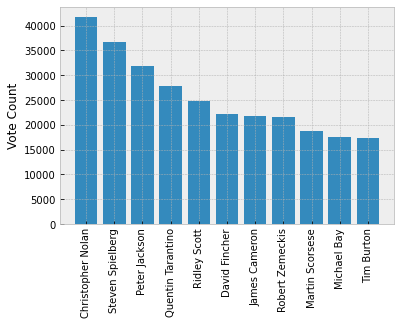

In [28]:
plt.style.use("bmh")
fig, ax = plt.subplots()
x = top_directors.loc[:10,'director']
y = top_directors.loc[:10,'vote_count']
visualize_bar(ax, x, y, x, 90, "Vote Count")

**Top 3 movies for the top 3 directors? For "Christopher Nolan" his top 3 movies are the following:**
- The Dark Knight with rating of 8.1
- Interstellar with rating of 8.0
- Inception with rating of 7.9

In [29]:
movies_clean[movies_clean.director == 'Christopher Nolan'].groupby(['original_title']).sum().sort_values(by=['vote_average'], ascending=False)

,id,popularity,budget,revenue,runtime,vote_count,vote_average
original_title,,,,,,,
The Dark Knight,155,8.466668,185000000,1001921825,152,8432,8.1
Interstellar,157336,24.949134,165000000,621752480,169,6498,8.0
Inception,27205,9.363643,160000000,825500000,148,9767,7.9
Memento,77,3.095625,9000000,39723096,113,2144,7.9
The Prestige,1124,2.582095,40000000,109676311,130,2519,7.8
The Dark Knight Rises,49026,6.591277,250000000,1081041287,165,6723,7.5
Batman Begins,272,5.400826,150000000,374218673,140,4914,7.3
Following,11660,0.225908,0,0,69,151,7.1
Insomnia,320,1.111488,46000000,113714830,118,564,6.6


**Top 3 movies for the top 3 directors? For "Steven Spielberg" his top 3 movies are the following:**
- Schindler's List with rating of 8.1
- Saving Private Ryan with rating of 7.7
- Catch Me If You Can with rating of 7.6

In [30]:
movies_clean[movies_clean.director == 'Steven Spielberg'].groupby(['original_title']).sum().sort_values(by=['vote_average'], ascending=False)

,id,popularity,budget,revenue,runtime,vote_count,vote_average
original_title,,,,,,,
Schindler's List,424,2.377288,22000000,321265768,195,2632,8.1
Saving Private Ryan,857,2.170136,70000000,481840909,169,3396,7.7
Catch Me If You Can,640,2.973115,52000000,352114312,141,2277,7.6
The Color Purple,873,1.012186,15000000,146292009,154,168,7.5
Raiders of the Lost Ark,85,4.578300,18000000,389925971,115,2506,7.5
Indiana Jones and the Last Crusade,89,3.536655,48000000,474171806,127,2031,7.4
Jurassic Park,329,2.204926,63000000,920100000,127,3169,7.4
Jaws,578,2.563191,7000000,470654000,124,1415,7.3
E.T. the Extra-Terrestrial,601,2.900556,10500000,792910554,115,1830,7.2


**Top 3 movies for the top 3 directors? For "Peter Jackson" his top 3 movies are the following:**
- The Lord of the Rings: The Return of the King with rating of 7.9
- The Lord of the Rings: The Fellowship of the Ring	 with rating of 7.8
- The Lord of the Rings: The Two Towers with rating of 7.8

In [31]:
movies_clean[movies_clean.director == 'Peter Jackson'].groupby(['original_title']).sum().sort_values(by=['vote_average'], ascending=False)

,id,popularity,budget,revenue,runtime,vote_count,vote_average
original_title,,,,,,,
The Lord of the Rings: The Return of the King,122,7.122455,94000000,1118888979,201,5636,7.9
The Lord of the Rings: The Fellowship of the Ring,120,8.575419,93000000,871368364,178,6079,7.8
The Lord of the Rings: The Two Towers,121,8.095275,79000000,926287400,179,5114,7.8
The Hobbit: The Desolation of Smaug,57158,4.310786,250000000,958400000,161,2952,7.6
Braindead,763,0.766646,3000000,242623,104,166,7.4
The Hobbit: The Battle of the Five Armies,122917,10.174599,250000000,955119788,144,3110,7.1
The Hobbit: An Unexpected Journey,49051,4.218933,250000000,1017003568,169,6417,6.9
Heavenly Creatures,1024,0.834029,5000000,3049135,99,149,6.6
The Lovely Bones,7980,1.673879,65000000,93525586,136,600,6.6


**Highest movie budget? Here we can see it's the movie "Pirates of the Caribbean: On Stranger Tides" with a budget of 380,000,000$**

In [32]:
movies_clean[movies_clean.budget == movies_clean.budget.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
3374,1865,tt1298650,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,sea|captain|mutiny|sword|prime minister,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3


**Longest movie runtime? it's the movie "The Story of Film: An Odyssey" with a runtime of 15 hours.**

In [33]:
movies_clean[movies_clean.runtime == movies_clean.runtime.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
3893,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,2011-09-03,14,9.2


**Most famous Genres? Here we can see that "Comedy" is the most Genre as it has a total vote count of 100806, then followed by "Drama" with a total vote count of 97204**

In [34]:
movies_clean.groupby(['genres']).sum().sort_values(by=['vote_count'], ascending=False)

,id,popularity,budget,revenue,runtime,vote_count,vote_average
genres,,,,,,,
Comedy,48950395,375.247922,6771216919,20323889661,66346,100806,4151.0
Drama,61905013,361.127929,5787292732,15107533347,79537,97204,4499.8
Adventure|Fantasy|Action,253738,57.045550,1776900000,7597483556,2139,41063,101.6
Drama|Romance,11588949,161.440368,2703887169,6798112125,32671,40579,1810.8
Comedy|Romance,11238921,159.129492,3413566906,11545724341,26918,39780,1556.2
...,...,...,...,...,...,...,...
TV Movie|Horror|Mystery,30931,0.089413,0,0,96,10,4.6
Action|Adventure|Foreign|Thriller,35153,0.583302,4500000,0,102,10,4.8
Drama|Action|Science Fiction|Thriller,55281,0.235312,0,0,90,10,3.5


**Top Movies for each Genre? Here we can see each famous movie for each genre**

In [35]:
movies_clean[['original_title','genres','vote_count']].groupby(['genres']).max()

,original_title,vote_count
genres,,
Action,í˜•ì‚¬ Duelist,2349
Action|Adventure,The Quest,1215
Action|Adventure|Animation,Tekkon kinkurÃ®to,142
Action|Adventure|Animation|Comedy|Drama,Everyone's Hero,30
Action|Adventure|Animation|Comedy|Family,VeggieTales: Jonah,17
...,...,...
Western|Drama|Crime|Romance,Ain't Them Bodies Saints,91
Western|History,The Long Riders,17
Western|History|War,The Alamo,60


**Most popular movie? top popular movie is "Jurassic World" with a popularity rating of 32.98**

In [36]:
movies_clean[movies_clean.popularity == movies_clean.popularity.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5


**Does the production of movies increase or decrease? as you can see here, the movie production increases each year**

In [37]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors = color)

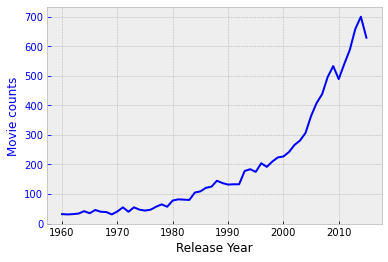

In [38]:
fig, axes = plt.subplots()
x = np.sort(movies_clean.release_date.dt.year.unique())
y = movies_clean.groupby(movies_clean.release_date.dt.year).count().iloc[:,0].to_list()
plot_timeseries(axes, x, y, 'blue', 'Release Year', 'Movie counts')

**Conclusions**
In the first section i gathered the data, then i assessed it and then cleaned it. I then deduced some answers to the questions listed above. The analysis contains the answer to the following questions:

What is the most rated movie?
What is the most voted movie?
Most successful director?
Top 3 movies for the top 3 directors?
Highest movie budget?
Longest movie runtime?
Most famous Genres?
Top Movies for each Genre?
Most popular movie?
Does the production of movies increase or decrease?

**Limitations**
This dataset had some limitations like some values are encoded in a wrong way.
It also has some missing values of some columns, i did not drop them as they are useful to answer other questions.
Also the dataset is not updated.